## 非平稳序列



直观上，平稳序列是在固定的水平和有限的区间内波动的序列。因此，如果序列背离了这两个特征，就可以认为是非平稳的。我们在介绍AR模型时提到，平稳AR序列的自相关系数很快就收敛到0. 即自相关系数衰减特别快。对于非平稳序列来说，自相关系数还有这样的特征吗？

**下面从自相关性的角度来看看非平稳序列特点**

看看gdp数据

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import numpy as np
%matplotlib inline
gdp=pd.read_csv("data\gdp.csv",index_col=0)
gdpacf=acf(gdp,nlags=20,fft=False)

其自相关系数如下。其中蓝线对应AR(1)的自相关系数（$\rho_1=0.89$）

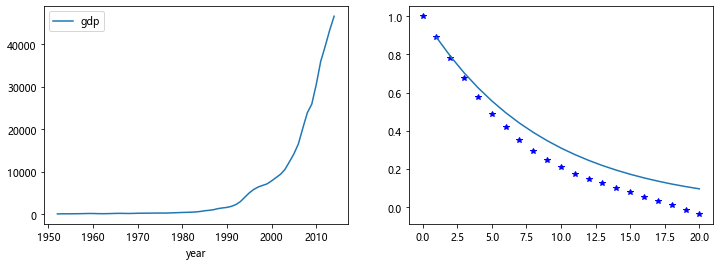

In [3]:
fig = plt.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(1,2,1)
gdp.plot(ax=ax1)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(gdpacf,"b*")
ax2.plot(np.arange(1,21),gdpacf[1]**np.arange(1,21))

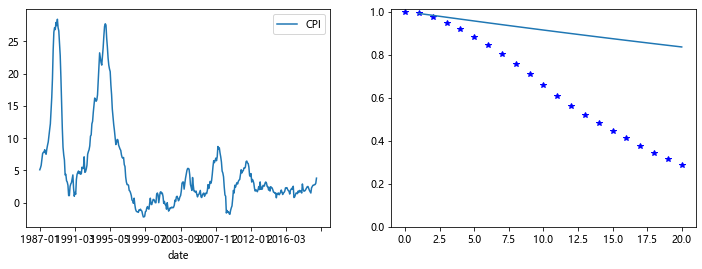

In [5]:
cpi=pd.read_csv("data\cpichina.csv",index_col=0)

fig = plt.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(1,2,1)
cpi.plot(ax=ax1)
ax2 = fig.add_subplot(1,2,2)
cpiacf=acf(cpi,nlags=20,fft=False)
ax2.plot(cpiacf,"b*")
ax2.set_ylim(0, 1.01)
ax2.plot(np.arange(1,21),cpiacf[1]**np.arange(1,21))


+ 在看看下面的序列

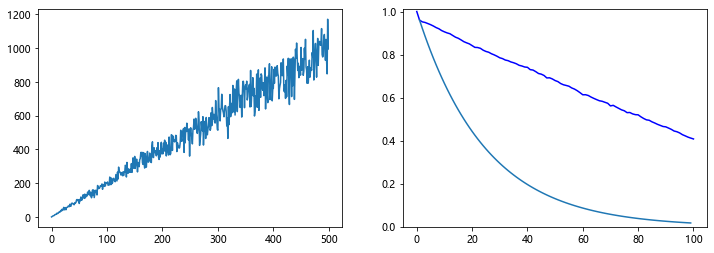

In [6]:
import numpy as np
ep=np.random.normal(10,2,size=500)
tr=np.arange(500)
x=tr+ep*tr/10

fig = plt.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(1,2,1)
ax1.plot(tr,x)

ax2 = fig.add_subplot(1,2,2)
sampleacfline=acf(x,nlags=100,fft=False)
plt.plot(sampleacfline,"b-")
ax2.set_ylim(0, 1.01)
ax2.plot(np.arange(1,100),sampleacfline[1]**np.arange(1,100))

一个序列具有确定的趋势，比如具有线性趋势项，其自相关性也会有类似的特点

另外还有一种非平稳序列，单位根序列，即随机游走序列，有时也会在数据上表现出某种趋势性，特别是时间跨度比较短的时候。不过如果时间足够长，我们会发现趋势性其实是随机的。为区别于有确定趋势的序列，我们有时也称单位根序列为随机趋势序列。其自相关性也会表现出类似的特点。

array([1.        , 0.99472163, 0.98961118, 0.98408819, 0.97860635,
       0.97323041, 0.96789714, 0.96225109, 0.9568014 , 0.95084309])

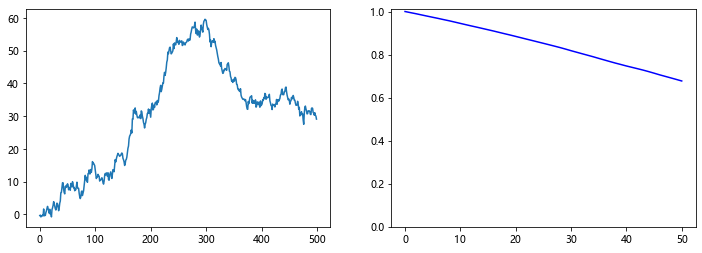

In [7]:
ep=np.random.normal(size=500)
ranwalk=ep.cumsum()
sampleacfline=acf(ranwalk,nlags=50,fft=False)

fig = plt.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(1,2,1)
ax1.plot(ranwalk)
ax2 = fig.add_subplot(1,2,2)
plt.plot(sampleacfline,"b-")
ax2.set_ylim(0, 1.01)
sampleacfline[:10]

**若序列有离群点**

+ 离群点对样本方差的影响大于对协方差的影响，一般方差增大更多。因此一定程度上会压平自相关系数
+ 离群点也可能带来新的相关性

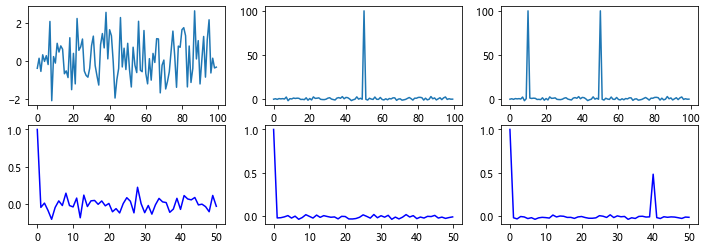

In [8]:
ep=ep[:100]
fig = plt.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(2,3,1)
ax1.plot(ep)
ax2 = fig.add_subplot(2,3,4) 
sampleacfline=acf(ep,nlags=50,fft=False)
ax2.plot(sampleacfline,"b-")

ep[50]=100 
ax1 = fig.add_subplot(2,3,2)
ax1.plot(ep)
ax2 = fig.add_subplot(2,3,5) 
sampleacfline=acf(ep,nlags=50,fft=False)
ax2.plot(sampleacfline,"b-")


ep[10]=100
ax1 = fig.add_subplot(2,3,3)
ax1.plot(ep)
ax2 = fig.add_subplot(2,3,6) 
sampleacfline=acf(ep,nlags=50,fft=False)
ax2.plot(sampleacfline,"b-")


课堂练习。利用stockclose.csv中的002355.SZ未复权数据，计算自相关系数

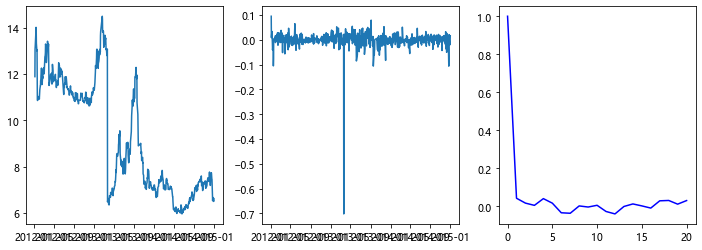

In [9]:
sz2355=pd.read_csv("data\stockclose.csv",index_col=0,usecols=["date","002355.SZ"],parse_dates=True)
sz2355=sz2355["2012-1-1":"2014-12-31"]
logret= np.log(sz2355) - np.log(sz2355.shift(1))

fig = plt.figure(figsize=(12,4)) 
ax1 = fig.add_subplot(1,3,1)
ax1.plot(sz2355)
ax2 = fig.add_subplot(1,3,2) 
ax2.plot(logret)
ax3 = fig.add_subplot(1,3,3)  
sampleacfline=acf(logret[1:],nlags=20,fft=False)
ax3.plot(sampleacfline,"b-")
 

In [7]:
sampleacfline

array([ 1.00000000e+00,  4.25242920e-02,  1.69110981e-02,  5.16691620e-03,
        4.05259110e-02,  1.67959626e-02, -3.38578325e-02, -3.64328807e-02,
        2.16568752e-03, -3.65057177e-03,  5.52208092e-03, -2.70472151e-02,
       -3.98741332e-02, -7.49215815e-04,  1.26283841e-02,  2.33359332e-03,
       -9.15383143e-03,  2.90409864e-02,  3.09375185e-02,  1.14792796e-02,
        3.03901597e-02])

**确定性趋势序列和随机趋势序列**

一个序列究竟是确定性趋势还是随机游走的随机趋势，这一点在实际问题中非常重要。比如对证券市场，我们常常提到趋势，市场分析人员常常有趋势形成，趋势被破坏等说法。但趋势是确定性（一定程度上可持续的），还是随机趋势（随时可能变化）呢？这个判断对投资显然是非常重要的。

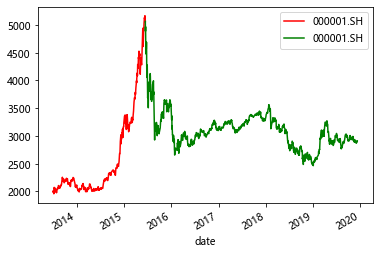

In [10]:

# 修改indexclosenew.csv将date字段名加入。
indexsh=pd.read_csv("data\indexclosenew.csv",index_col=0,usecols=["date","000001.SH"],parse_dates=True)
 
stock=indexsh["2013-7-1":]
 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)        
        
stock[:"2015-6-15"].plot(ax=ax,color='r')
stock["2015-6-15":].plot(ax=ax,color='g')

另外,全球变暖问题也是一个非常重要的问题，其数据如下：

In [12]:

data=pd.read_csv("data\m-NHTs.txt",index_col=0 )
print(data.index[0],data.index[-1])

1880 2010


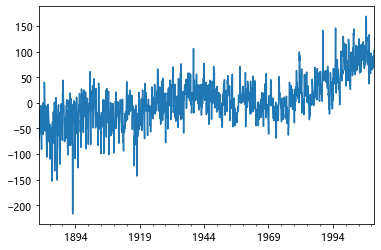

In [13]:
ind=pd.date_range("1880-1","2010-2",freq="M")
n=len(ind)
data=pd.Series(data.values.flatten()[:n],index=ind)
data.plot()

+ 若序列是确定性的趋势，则表明全球气温变暖会持续下去，如果是随机趋势，这全球气温变暖的论断未必成立。
+ 如何区分这两种情形呢？ 
+ 随机趋势和确定性趋势序列的识别有时候是很难识别的。或者说当数据量不够多时，我们其实是无法识别随机趋势和确定性趋势。
+ 下面首先讨论两种序列的差异


## 确定性趋势序列和随机趋势（单位根）序列的比较

确定性线性趋势序列$y_t$
$$y_t=\beta_0+\beta_1 t +r_t$$$$r_t\sim \mbox{ARMA}(p,q)$$

这个序列的分析和一般的ARMA模型差别不大，因为$y_t$和$r_t$之间只差一个非随机的项。

而随机趋势模型则有很大的差异，我们用最简单的随机游走来说明
$$p_t=p_{t-1}+a_t$$
我们可以把$p_t$理解为对数价格，$a_t$理解为新息

+ 首先这个模型形式上和AR模型一样，只是其对应的多项式$A(z)=1-z=0$的根为1，因此称其为单位根过程。

**预测**
对上面的单位根序列来说，考虑预测原点为$h$的$l$步预测，由

$${p_{h + l}} = {p_h} + \sum\limits_{j = 1}^h {{a_{h + j}}} $$

预测为：

$${\hat p_h}\left( l \right) = {p_h}$$

说明： **不可预测，没有均值回复性**

**强记忆**

脉冲响应 ${p_{\rm{t}}} = {p_0} + \sum\limits_{j = 1}^t {{a_i}} $ ，新息的效应是永恒的。

相关性
 
$$\begin{array}{l}
{\rm{Var}}\left( {{p_t}} \right) = t\sigma _a^2,\\
{\rm{Cov}}\left( {{p_t},{p_{t - l}}} \right) = \left( {t - l} \right)\\
\rho \left( {{p_t},{p_{t - l}}} \right) = \sqrt {\frac{{t - l}}{t}} 
\end{array}$$

## 单位根序列

在通常的ARMA模型中，因为平稳性的需要，我们要求其特征多项式的根都在单位圆外，即其没有单位根。

若序列经过差分后为ARMA序列，我们记其为ARIMA序列。相应的模型称为ARIMA模型（求和自回归移动平均模型）

$$y_t=y_{t-1} +r_t$$ $$r_t\sim \mbox{ARMA}(p,q)$$

上述模型也记为ARIMA(p,1,q)

如果需要做d次差分后才能用ARMA模型拟合，则为 ARIMA(p,d,q)模型

## 单位根检验

+ 不过如果认为序列没有确定性趋势，序列的不平稳仅仅是因为单位根造成的，这种不确定性的检验可以通过单位根检验进行。我们下面介绍单位根检验，

### DF 检验

设$p_t$是一个资产的对数价格，Dickey-Fuller 单位根检验考虑AR(1)模型：
$$p_t=\phi_1p_{t-1}+\epsilon_t$$
或
$$p_t=\phi_0+\phi_1p_{t-1}+\epsilon_t$$

做如下的假设检验

$${H_0}:{\phi _1} = 1{  \leftrightarrow }{H_a}:{\phi _1} < 1$$

最小二乘估计：
$$\hat{\phi}_1=\frac{\sum_{t=1}^Tp_{t-1}p_t}{\sum_{t=1}^{T}p_{t-1}^2 },\quad \hat{\sigma_\epsilon}^2=\frac{\sum_{t=1}^T(p_{t}-\hat{\phi}_1p_{t-1})^2}{T-1 }$$

DG检验统计量定义为：
 $$DF=\frac{\hat{\phi}_1-1}{{\mbox{std}}(\hat{\phi}_1)}$$
  
  其中 
  
  $$\hat{\phi}_1-1= \frac{\sum_{t=1}^Tp_{t-1}e_t}{\sum_{t=1}^T(p_{t-1})^2}$$
  
 $$\mbox{std}(\hat{\phi}_1)= \frac{\sigma_\epsilon }{ \sqrt{\sum_{t=1}^T(p_{t-1})^2} }$$
    

上述 $DF$统计量收敛于布朗运动的函数，非标准，并且模型中有无截距时渐进分布也不同。

### ADF 检验

DF检验只考虑了一阶自回归的情形，ADF检验将该情形扩展为p阶

记 $\Delta x_t=x_t-x_{t-1}$, 考虑AR(p)模型

$$x_t=c_t+\beta x_{t-1}+\sum_{i=1}^{p-1}\phi_i \Delta x_{t-i} +\epsilon_t$$

+ 该模型是 AR(p)模型
+ $\beta=1$时，模型有单位根

单位根检验 
$$H_0: \beta=1\leftrightarrow H_a: \beta<1$$

$$\mbox{ADF-test}=\frac{\hat{\beta}_1-1}{\mbox{std}(\hat{\beta}_1)}$$
 

用上面随机游走的例子，利用statsmodels 中的 adfuller。

输出包括：adf统计量，p值，以及AIC选定的阶，数据量，阀值等

In [14]:
from statsmodels.tsa.stattools import adfuller
adfuller(ranwalk)

(-1.9107686545531573,
 0.32701227715557313,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1397.5252261967353)

考察气温数据

In [15]:
adfuller(data)

(-1.4633039785131507,
 0.5515799925267907,
 23,
 1537,
 {'1%': -3.4346117143132786,
  '5%': -2.8634222847534607,
  '10%': -2.567772099925964},
 14176.904909354456)

看看对数收盘价序列

In [16]:
np.log(stock)["000001.SH"]

date
2013-07-01    7.598521
2013-07-02    7.604177
2013-07-03    7.598032
2013-07-04    7.603947
2013-07-05    7.604495
                ...   
2019-12-03    7.967176
2019-12-04    7.964891
2019-12-05    7.972283
2019-12-06    7.976600
2019-12-09    7.976600
Name: 000001.SH, Length: 1573, dtype: float64

In [17]:
adfuller(np.log(stock)["000001.SH"])

(-2.2817857425571266,
 0.17790973755026146,
 23,
 1549,
 {'1%': -3.434578644140842,
  '5%': -2.8634076888727376,
  '10%': -2.5677643275842597},
 -8801.954436557173)

再看看平稳序列（白噪声）

In [18]:
ep=np.random.normal(size=500)
adfuller(ep)

(-14.25275787259366,
 1.4714142372093357e-26,
 2,
 497,
 {'1%': -3.4435761493506294,
  '5%': -2.867372960189225,
  '10%': -2.5698767442886696},
 1368.8488210899238)

+ 上述单位根检验中，我们都给定一个模型，单位根检验其实就是模型参数的检验。因此，模型的设定非常重要。有无截距项，有无确定性趋势项，都对检验有重要的影响。比如上面气温问题，我们的检验表明不拒绝单位根假设，这似乎说明气温的趋势是随机的。
+ 下面我们在adfuller检验中增加常数项和趋势项，看看检验的结果

In [19]:
adfuller(data,regression='ct')

(-3.3442297731314556,
 0.05929731886585749,
 23,
 1537,
 {'1%': -3.9646721812357297,
  '5%': -3.4133503111203813,
  '10%': -3.1287339057576666},
 14168.719086125735)

+ 这个结果说明，序列是单位根序列的证据减弱。
+ 其实对上述气温数据，用有确定性趋势的模型和随机趋势模型都可以很好地拟合，因此，若不考虑其它的因素，仅仅通过模型似乎很难确定全球气温是否真正变暖。
+ 如果数据量持续增加，我们一年一年地累积数据。如果是单位根过程，其有很大概率会有掉头向下的情形发生，若是线性趋势，则序列会一直保持增长。

## 非平稳序列的平稳化


+ 去趋势,De-trending is fundamental.  
+ Seasonal adjustment 
+ Transformation  
   - log
   - diff

In [20]:
import numpy as np
ep=np.random.normal(10,2,size=500)
tr=np.arange(500)
x=tr+ep*tr/10


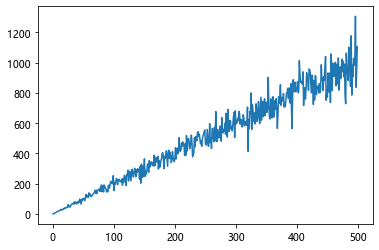

In [21]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(tr,x)

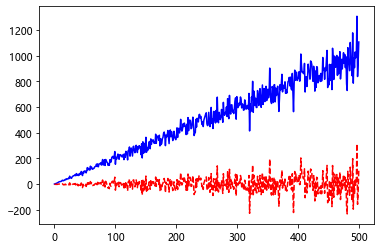

In [22]:
from statsmodels.tsa.tsatools import detrend
y=detrend(x,order=1)
plt.plot(tr,x,"b-",tr,y,"r--")

<ipython-input-23-58ba19cb54dc>:1: RuntimeWarning: divide by zero encountered in log
  y1=np.log(x)


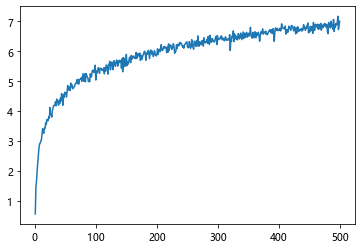

In [23]:
y1=np.log(x)
plt.plot(tr,y1)  

<ipython-input-24-ba3c73e5d29b>:1: RuntimeWarning: divide by zero encountered in log
  x1=np.log(tr)


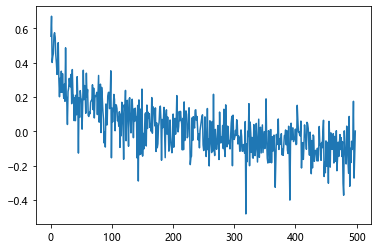

In [24]:
x1=np.log(tr) 
from statsmodels.regression.linear_model import OLS
reg=OLS(y1[1:],x1[1:])
mod=reg.fit()
plt.plot(mod.resid)
# plt.plot(y1[1:],x1[1:])  

可加分解，气温数据

Text(0, 0.5, 'Residual')

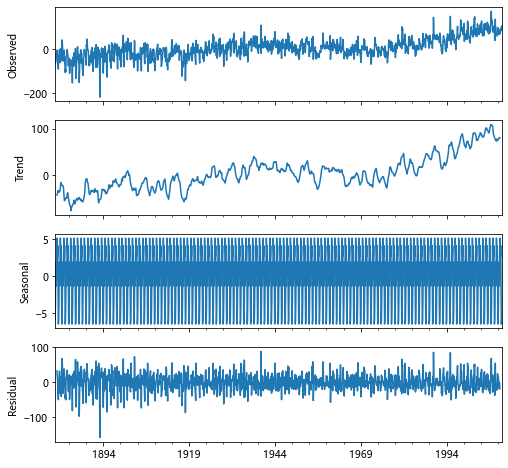

In [25]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(data)
fig, axes = plt.subplots(4, 1, sharex=True,figsize=(8,8))
res.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
res.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
res.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
res.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')


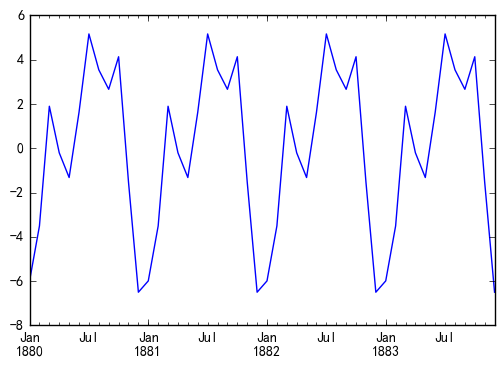

In [22]:
#季节项细节
res.seasonal[:48].plot()

其它提取趋势的办法，比如HP 滤波

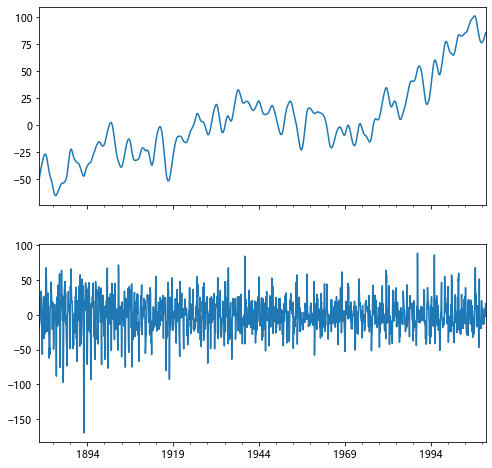

In [26]:
res1=sm.tsa.filters.hpfilter(data)
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(8,8))
res1[0].plot(ax=axes[1])
res1[1].plot(ax=axes[0])

